Epoch 1/5
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1490 - accuracy: 0.9538 - val_loss: 0.0436 - val_accuracy: 0.9861
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0414 - val_accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0326 - accuracy: 0.9895
Test accuracy: 0.9894999861717224
313/313 [==============================] - 3s 10ms/step - loss: 0.0364 - accuracy: 0.9886
Test accuracy on adversarial examples: 0.9886000156402588


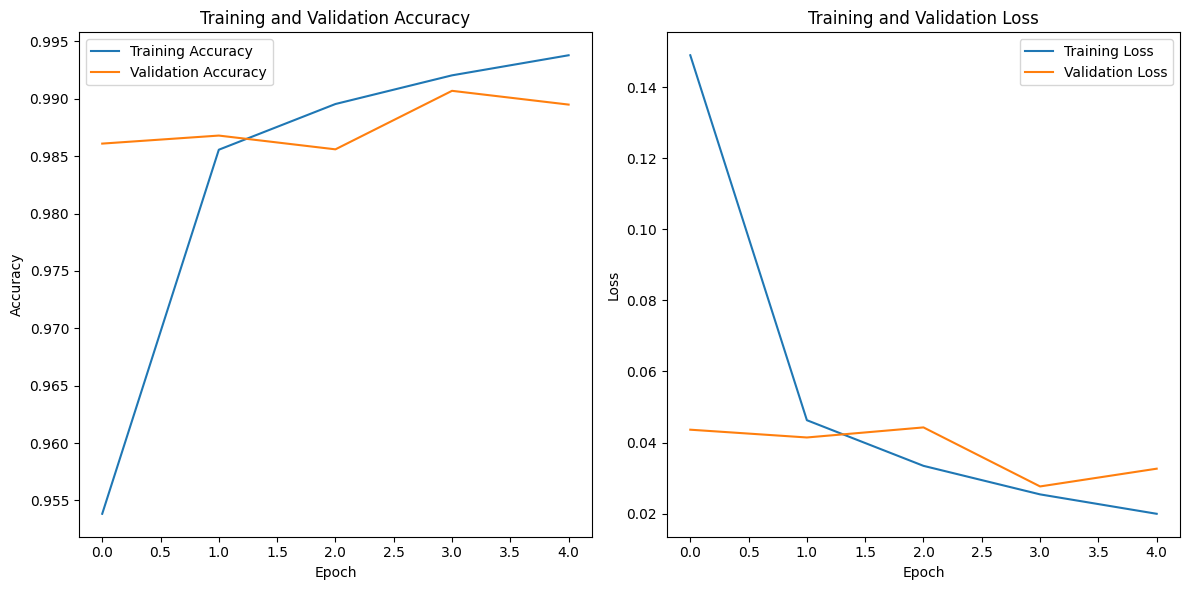

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model architecture
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = build_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Plot model architecture
def plot_model_architecture(model):
    tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Train the model
history = model.fit(np.expand_dims(x_train, -1), y_train, epochs=5, validation_data=(np.expand_dims(x_test, -1), y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(np.expand_dims(x_test, -1), y_test)
print(f"Test accuracy: {test_acc}")

# Generate adversarial examples (simplified example)
adv_examples = x_test + 0.1 * np.sign(np.random.randn(*x_test.shape))

# Evaluate model on adversarial examples
adv_test_loss, adv_test_acc = model.evaluate(np.expand_dims(adv_examples, -1), y_test)
print(f"Test accuracy on adversarial examples: {adv_test_acc}")

# Plot model architecture
plot_model_architecture(model)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
